In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
aqi_2019_csv = pd.read_csv("./data/raw_data/daily_aqi_by_county_2019.csv")
aqi_2020_csv = pd.read_csv("./data/raw_data/daily_aqi_by_county_2020.csv")

In [3]:
aqi_2019 = aqi_2019_csv.groupby(by = ['State Name', 'county Name']).mean()
aqi_2019.reset_index(inplace = True)
aqi_2019.drop(columns = ['State Code', 'County Code', 'Number of Sites Reporting'], inplace = True)
aqi_2019.rename(columns = {'county Name' : 'County Name', 'AQI' : 'Mean_Annual_AQI'}, inplace = True)

In [4]:
aqi_2020 = aqi_2020_csv.groupby(by = ['State Name', 'county Name']).mean()
aqi_2020.reset_index(inplace = True)
aqi_2020.drop(columns = ['State Code', 'County Code', 'Number of Sites Reporting'], inplace = True)
aqi_2020.rename(columns = {'county Name' : 'County Name', 'AQI' : 'Mean_Annual_AQI'}, inplace = True)

In [5]:
#output them to a csv file
aqi_2019.to_csv("./data/aqi_2019.csv")
aqi_2020.to_csv("./data/aqi_2020.csv")

In [6]:
aqi_2019.head()

,State Name,County Name,Mean_Annual_AQI
0,Alabama,Baldwin,38.291513
1,Alabama,Clay,31.149533
2,Alabama,Colbert,35.520913
3,Alabama,DeKalb,39.711911
4,Alabama,Elmore,38.421053


In [7]:
aqi_2020_csv['Month'] = [int(date[5:7]) for date in aqi_2020_csv['Date']]
aqi_2019_csv['Month'] = [int(date[5:7]) for date in aqi_2019_csv['Date']]


aqi_2020_csv['Day'] = [int(date[8:]) for date in aqi_2020_csv['Date']]
aqi_2019_csv['Day'] = [int(date[8:]) for date in aqi_2019_csv['Date']]

In [8]:
march_may_2020 = aqi_2020_csv[(aqi_2020_csv['Month'] >= 3) & (aqi_2020_csv['Month'] <= 5)]
march_may_2019 = aqi_2019_csv[(aqi_2019_csv['Month'] >= 3) & (aqi_2019_csv['Month'] <= 5)]

In [9]:
march_may_2020 = march_may_2020.groupby(by = ['State Name', 'county Name']).mean()
march_may_2020.reset_index(inplace = True)
march_may_2020.drop(columns = ['State Code', 'County Code', 'Number of Sites Reporting'], inplace = True)
march_may_2020.rename(columns = {'county Name' : 'County Name', 'AQI' : 'Mean_Annual_AQI'}, inplace = True)

In [10]:
march_may_2019 = march_may_2019.groupby(by = ['State Name', 'county Name']).mean()
march_may_2019.reset_index(inplace = True)
march_may_2019.drop(columns = ['State Code', 'County Code', 'Number of Sites Reporting'], inplace = True)
march_may_2019.rename(columns = {'county Name' : 'County Name', 'AQI' : 'Mean_Annual_AQI'}, inplace = True)

In [11]:
#output the spring AQI data to a csv file

march_may_2019.to_csv("./data/spring_aqi_2019.csv")
march_may_2020.to_csv("./data/spring_aqi_2020.csv")

In [12]:
march_may_2019.head()

,State Name,County Name,Mean_Annual_AQI,Month,Day
0,Alabama,Baldwin,42.056180,3.988764,16.078652
1,Alabama,Clay,30.785714,4.000000,16.500000
2,Alabama,Colbert,39.163043,4.000000,15.836957
3,Alabama,DeKalb,43.329545,4.045455,15.556818
4,Alabama,Elmore,40.932584,4.033708,15.820225


Here, I do a hypothesis test to see if the mean from this year and last are different. We will only use the data from locations that have values in both 2019 and 2020 to compare

In [13]:
march_may_2019.rename(columns = {'Mean_Annual_AQI' : 'Mean_AQI_2019'}, inplace = True)
march_may_2019 = march_may_2019[['State Name', 'County Name', 'Mean_AQI_2019']]
march_may_2020.rename(columns = {'Mean_Annual_AQI' : 'Mean_AQI_2020'}, inplace = True)
march_may_2020 = march_may_2020[['State Name', 'County Name', 'Mean_AQI_2020']]

aqi_both_years = march_may_2019.merge(right = march_may_2020, on = ['State Name', 'County Name'], how = 'inner')

In [14]:
aqi_both_years['Difference'] = aqi_both_years['Mean_AQI_2020'] - aqi_both_years['Mean_AQI_2019']

In [15]:
aqi_both_years.head()

,State Name,County Name,Mean_AQI_2019,Mean_AQI_2020,Difference
0,Arizona,Apache,11.032609,7.709677,-3.322931
1,Arizona,Cochise,56.141304,14.451613,-41.689691
2,Arizona,Coconino,49.641304,43.064516,-6.576788
3,Arizona,Gila,65.847826,42.193548,-23.654278
4,Arizona,La Paz,50.879121,40.322581,-10.556540


In [16]:
print(aqi_both_years['Mean_AQI_2019'].mean())

40.97532333372741


In [17]:
print(aqi_both_years['Mean_AQI_2020'].mean())

30.333414585614968


Now that we have cleaned our data, we can do the hypothesis test! We are wanting to test if there is a difference between the Mean AQI of Spring 2019 and Spring 2020. We will use a one sample t test on the difference between Spring 2020 and Spring 2019. This assumes that the observations for the two years are independent. If there has been no change, we would expect the difference to be 0. 

Null hypothesis:   
Mu of the differences = 0

Alternative Hypothesis:  
Mu of the differences does not = 0

In [18]:
stats.ttest_1samp(aqi_both_years['Difference'], popmean = 0 )

Ttest_1sampResult(statistic=-15.925452393126719, pvalue=8.803100876483336e-44)

From the results of this t test, we reject the null hypothesis that there is no difference between the mean AQI in Spring 2019 and the mean AQI in Spring 2020. There is sufficient evidence that these means are difference, with a p value of 8.803 * 10 ^ -44.

Next, we will do a hypothesis test to see if AQI is correlated with covid deaths

In [19]:
covid_percent_deaths = pd.read_csv("./data/covid_percent_died.csv")

In [20]:
#rename the data to have state abbreviations instead of full name
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

aqi_2020 = aqi_2020.replace({'State Name': us_state_abbrev})
aqi_2019 = aqi_2019.replace({'State Name': us_state_abbrev})

In [21]:
covid_percent_deaths.head()

,County Name,State,death_rate
0,Autauga,AL,1.502952
1,Baldwin,AL,1.042176
2,Barbour,AL,0.970874
3,Bibb,AL,1.694915
4,Blount,AL,0.951814


In [22]:
#calculate the mean and fill any null values with that mean
covid_percent_deaths = covid_percent_deaths.replace([np.inf, -np.inf], np.nan)
mean_fatality_rate = covid_percent_deaths['death_rate'].mean()
covid_percent_deaths['death_rate'] = covid_percent_deaths['death_rate'].fillna(mean_fatality_rate)

In [23]:
aqi_2020_covid = aqi_2020.merge(right = covid_percent_deaths, right_on = ['State', 'County Name'], left_on = ['State Name', 'County Name'])

aqi_2019_covid = aqi_2019.merge(right = covid_percent_deaths, right_on = ['State', 'County Name'], left_on = ['State Name', 'County Name'])

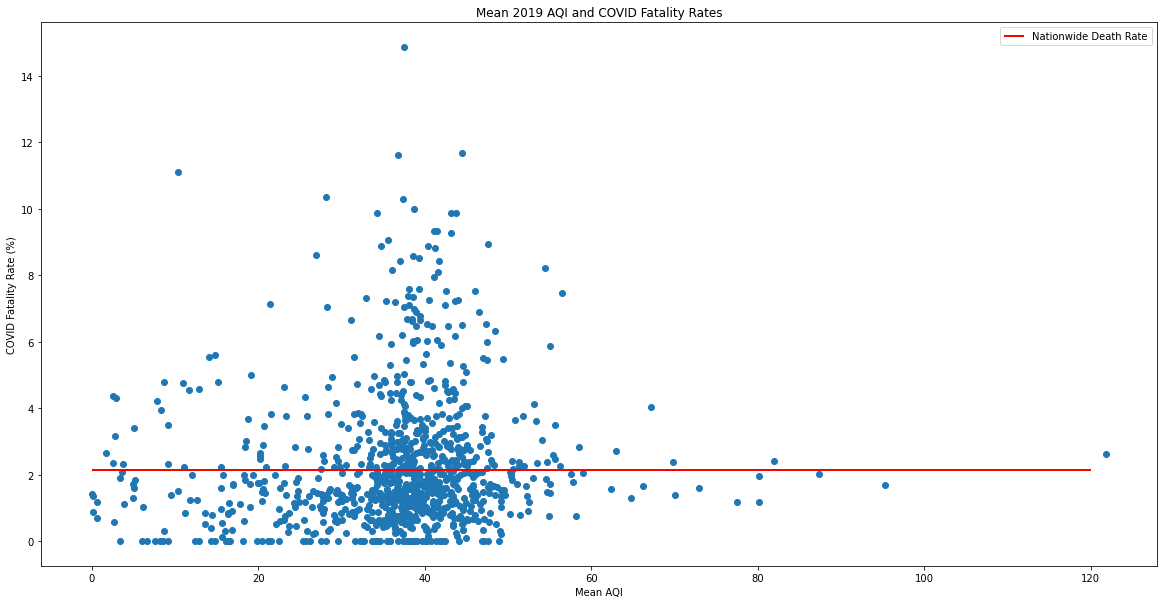

In [34]:
plt.figure(figsize=(20,10))
plt.scatter(aqi_2019_covid['Mean_Annual_AQI'], aqi_2019_covid['death_rate'])
plt.hlines(y=mean_fatality_rate, xmin = 0, xmax = 120, linewidth=2, color='r', label = "Nationwide Death Rate")
plt.title("Mean 2019 AQI and COVID Fatality Rates")
plt.xlabel("Mean AQI")
plt.ylabel("COVID Fatality Rate (%)")
plt.legend()

Those values to the right seem a little strange... let's look into them

In [25]:
aqi_2019_covid[aqi_2019_covid['Mean_Annual_AQI'] >= 80]

,State Name,County Name,Mean_Annual_AQI,State,death_rate
26,AZ,Pinal,80.178082,AZ,1.959886
59,CA,Los Angeles,81.920548,CA,2.413651
65,CA,Mono,80.216438,CA,1.176471
72,CA,Riverside,87.427397,CA,2.032044
75,CA,San Bernardino,95.290411,CA,1.702708
459,MO,New Madrid,121.876712,MO,2.627258


Text(0.5, 1.0, 'New Madrid, MO AQI')

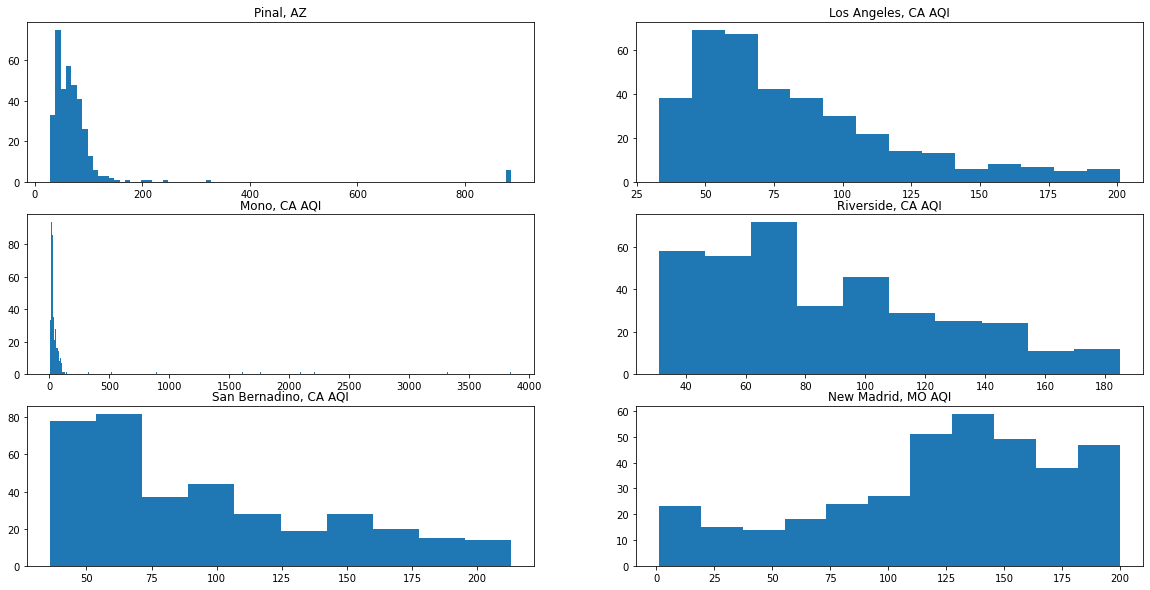

In [26]:
fig, axs = plt.subplots(nrows = 3, ncols = 2, figsize = (20,10))
axs[0,0].hist(aqi_2019_csv[aqi_2019_csv['county Name'] == 'Pinal']['AQI'], bins = 'auto')
axs[0,0].set_title("Pinal, AZ")
axs[0,1].hist(aqi_2019_csv[aqi_2019_csv['county Name'] == 'Los Angeles']['AQI'], bins = 'auto')
axs[0,1].set_title("Los Angeles, CA AQI")
axs[1,0].hist(aqi_2019_csv[aqi_2019_csv['county Name'] == 'Mono']['AQI'], bins = 'auto')
axs[1,0].set_title("Mono, CA AQI")
axs[1,1].hist(aqi_2019_csv[aqi_2019_csv['county Name'] == 'Riverside']['AQI'], bins = 'auto')
axs[1,1].set_title("Riverside, CA AQI")
axs[2,0].hist(aqi_2019_csv[aqi_2019_csv['county Name'] == 'San Bernardino']['AQI'], bins = 'auto')
axs[2,0].set_title("San Bernadino, CA AQI")
axs[2,1].hist(aqi_2019_csv[aqi_2019_csv['county Name'] == 'New Madrid']['AQI'], bins = 'auto')
axs[2,1].set_title("New Madrid, MO AQI")

For the most part, these are surprisingly evenly distributed (unfortunately for the environment). The only one I consider to be a mistake is Mono, CA, where the AQI is over 3000.... Pinal, AZ may also have had some mistypes, but there are several days worth of 886 AQI, so that is strange. Either way, we will leave the data as is since there are only a few values that may be erroneous

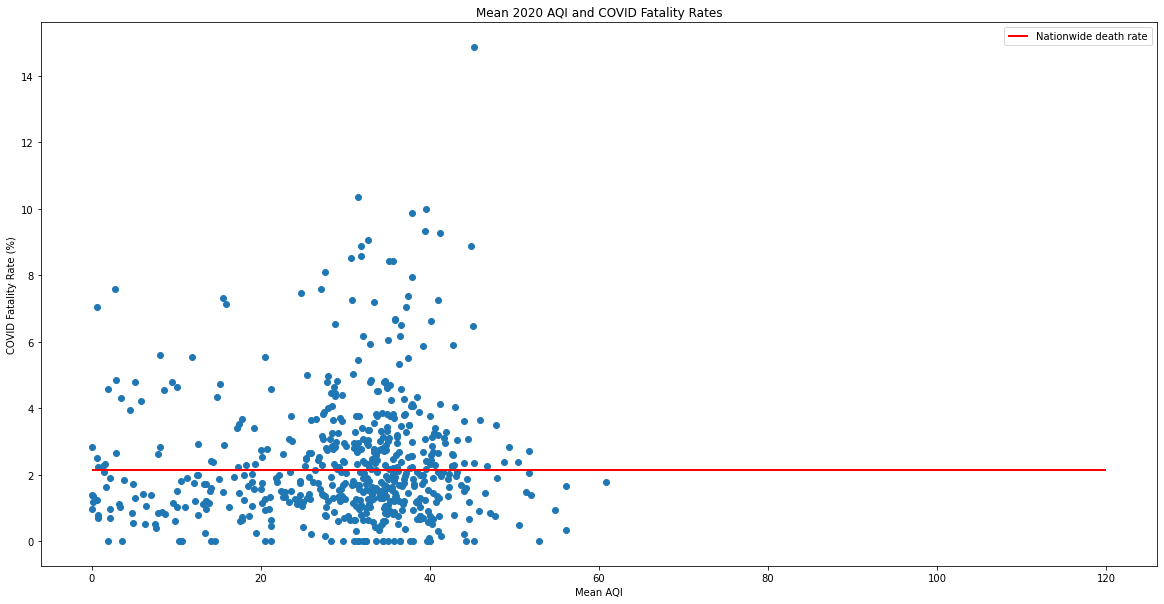

In [33]:
plt.figure(figsize=(20,10))
plt.scatter(aqi_2020_covid['Mean_Annual_AQI'], aqi_2020_covid['death_rate'])
plt.hlines(y=mean_fatality_rate, xmin = 0, xmax = 120, linewidth=2, color='r', label = "Nationwide death rate")
plt.title("Mean 2020 AQI and COVID Fatality Rates")
plt.xlabel("Mean AQI")
plt.ylabel("COVID Fatality Rate (%)")
plt.legend()

Let's see if there is a significant correlation between these 

Text(0.5, 1.0, 'Distribution of COVID Death Rate')

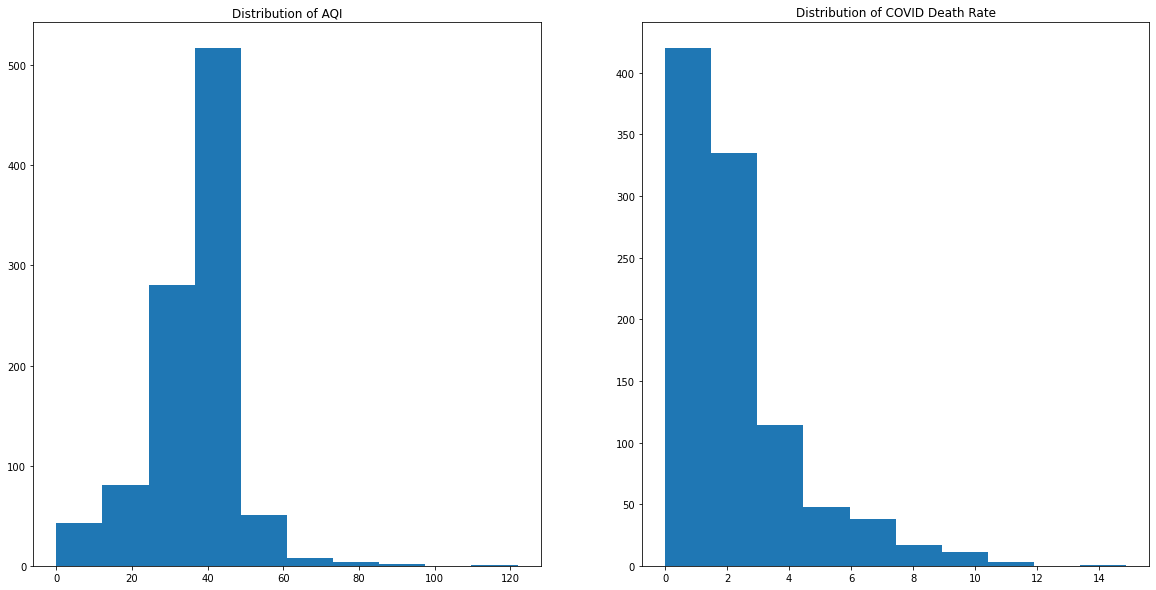

In [29]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (20,10))
axs[0].hist(aqi_2019_covid['Mean_Annual_AQI'])
axs[0].set_title('Distribution of AQI')
axs[1].hist(aqi_2019_covid['death_rate'])
axs[1].set_title('Distribution of COVID Death Rate')

We see that this data is at least near normal. The data is also continuous and there appears to be a near linear relationship between the two, so we will use pearson's correlation coefficient

In [30]:
aqi_2019_corr = stats.spearmanr(aqi_2019_covid['Mean_Annual_AQI'], aqi_2019_covid['death_rate'])
print(aqi_2019_corr)

SpearmanrResult(correlation=0.1599565656905478, pvalue=4.3841014951741387e-07)


Conclusion: 

There is a significant positive correlation between the mean 2019 AQI observation in a county and the county's death rate from COVID.

While this is an important finding, we caveat this by pointing out that county population and demographics may be confounding variables. The counties that are more highly populated likely have worse Air quality, and they may have busier hospitals where they received less attention. We highlight these possibilities alongside our findings.

Text(0.5, 1.0, 'Distribution of COVID Death Rate')

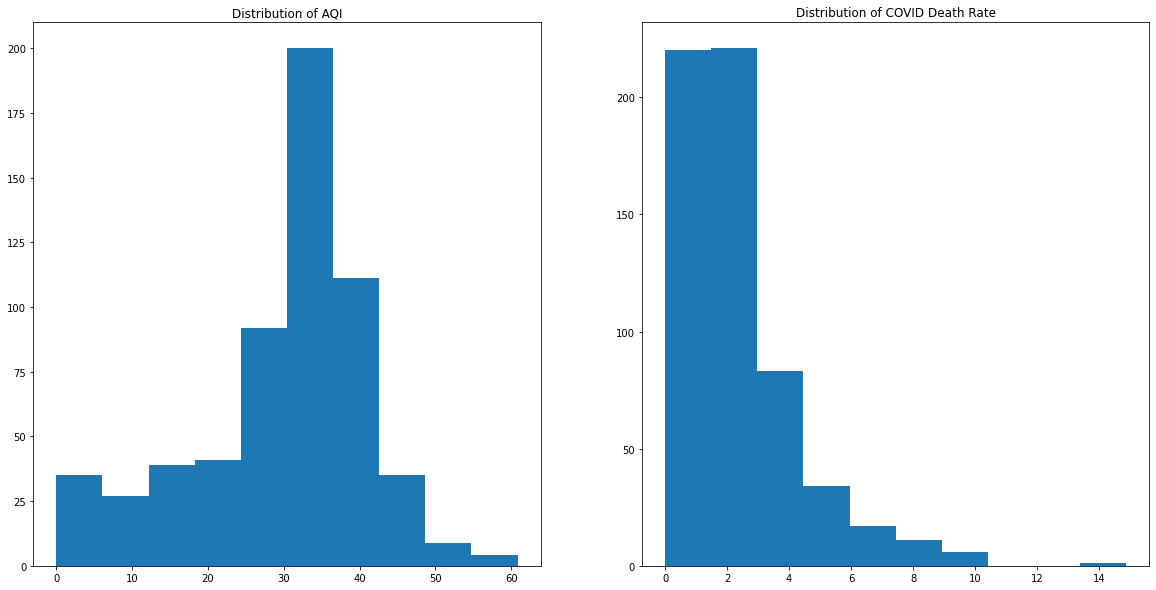

In [31]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (20,10))
axs[0].hist(aqi_2020_covid['Mean_Annual_AQI'])
axs[0].set_title('Distribution of AQI')
axs[1].hist(aqi_2020_covid['death_rate'])
axs[1].set_title('Distribution of COVID Death Rate')

In [32]:
aqi_2020_corr = stats.spearmanr(aqi_2020_covid['Mean_Annual_AQI'], aqi_2020_covid['death_rate'])
print(aqi_2020_corr)

SpearmanrResult(correlation=0.07157759165803539, pvalue=0.08158111203038623)


We do not find any evidence to suggest that 2020 air quality is correlated with severity of COVID cases.